## SISTEMA MTS REGIONALE DI RILEVAZIONE DEI FLUSSI DI TRAFFICO
- Il Sistema regionale di rilevazione del traffico dell’Emilia-Romagna consente il monitoraggio continuo (24 ore su 24) dei flussi di traffico sulle principali tratte stradali.
- È costituito da 281 postazioni dotate di sensori a microonde 
- Le postazioni rilevano i veicoli in transito e li classificano nelle seguenti categorie:
<ul>
  <li>1. MOTOVEICOLI</li>
  <li>2. AUTO E MONOVOLUME</li>
  <li>3. AUTO E MONOVOLUME CON RIMORCHIO</li>
  <li>4. FURGONCINI E CAMIONCINI</li>
    <li>5. CAMION MEDI (fino a 7,5 m)</li>
    <li>6. CAMION GRANDI</li>
    <li>7. AUTOTRENI (autocarri con rimorchio)</li>
    <li>8. AUTOARTICOLATI (trattori con semirimorchio)</li>
    <li>9. AUTOBUS</li>
    <li>10. ALTRI (mezzi speciali, trasporti eccezionali, mezzi agricoli, macchine operatrici...)</li>
</ul>
  
Le categorie vengono aggregate e classificate ulteriormente come mezzi leggeri (1-4) e mezzi pesanti (5-10)
<h3>In questo notebook viene analizzato il traffico con riferimento al solo anno 2019!</h3>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import geopandas as gpd
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

data_post = pd.read_csv('MTS_2019.csv')
data_post.head(2)

,AnnoMese,Postazione,Giorno,N Giorno Settimana,Strada,Transiti - Totale,Transiti - Non Classificato,Transiti - Leggeri,Transiti - Pesanti,Transiti - Diurno,Transiti - Notturno,Transiti - Feriali,Transiti - Festivi
0,2020/01,6,01/01/2020,3,SS 12 tra Fiumalbo e Abetone,4.573,0.0,4.560,13.0,3.451,1.122,0.000,4.573
1,2020/01,6,02/01/2020,4,SS 12 tra Fiumalbo e Abetone,3.709,0.0,3.664,45.0,3.226,483.000,3.709,0.000


In [2]:
# dimensione dati 
print('Righe ', data_post.shape[0])
print('Colonne ',data_post.shape[1])

Righe  20853
Colonne  13


### Aggregazione dati per campo di analisi 

In [3]:
agg_by_Strada = data_post.groupby(by = ['Strada'])
agg_by_nr_postazione = data_post.groupby(by= data_post['Postazione'])


### Analisi Traffico Mezzi Leggeri vs. Pesanti

#### Visualizzazione trafico transiti leggeri per ogni strada 
<p>Per ragioni di spazio si visualizzano solo le prime due strade.  Notare effetto lockdown a partire dal 10 Marzo</p>

Asse viario Modena-Sassuolo tra Modena e Baggiovara


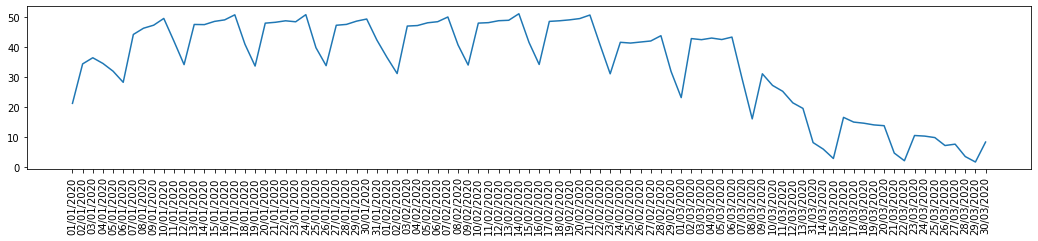

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


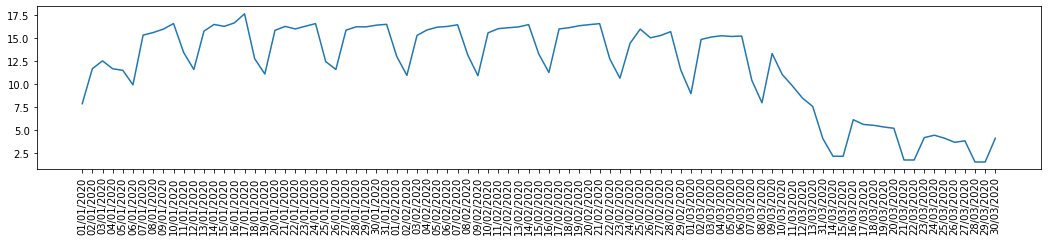

Piazzale Milano (ex SS 9) c/o ponte fiume Po


In [12]:
counter = 0
for index, strada in agg_by_Strada:
    print(index)
    counter += 1
    if counter > 2 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Leggeri'])
    plt.xticks(rotation='vertical')
    plt.show()

#### Visualizzazione trafico transiti pesanti per ogni Strada 
<p>Notare effetto lockdown a partire dal 10 Marzo</p>

Asse viario Modena-Sassuolo tra Modena e Baggiovara


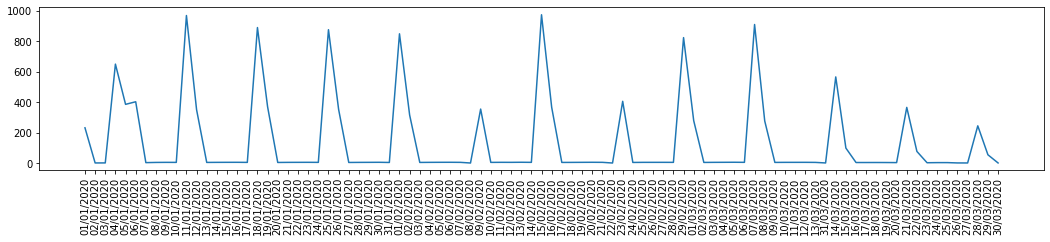

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


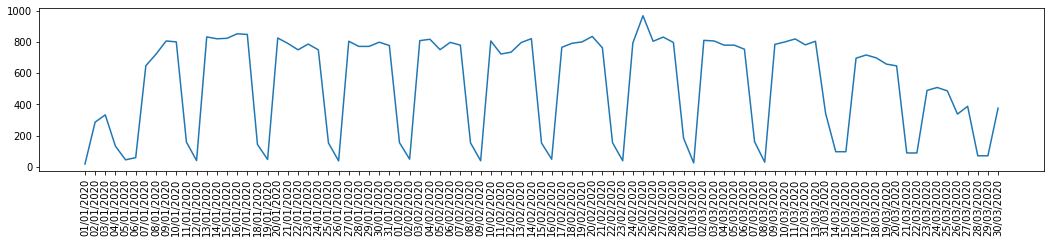

Piazzale Milano (ex SS 9) c/o ponte fiume Po


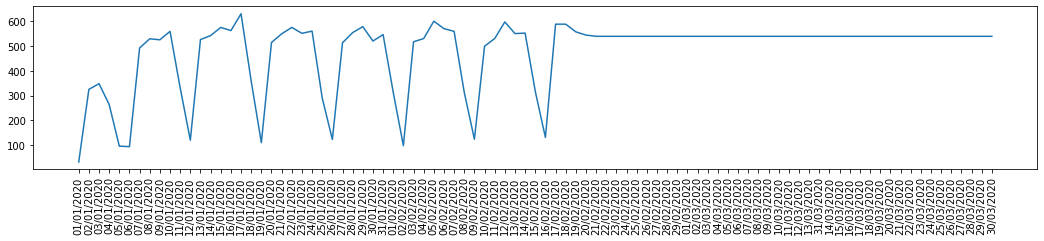

SP 1 da Villafranca di Forlì al confine provinciale


In [13]:
counter = 0
for index, strada in agg_by_Strada:
    print(index)
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Pesanti'])
    plt.xticks(rotation='vertical')
    plt.show()

### Analisi Traffico - Feriali vs. Festivi 

#### Visualizzazione trafico transiti per ogni strada durante i giorni feriali 
<p>Per ragioni di spazio si visualizzano solo le prime due strade. </p>

Asse viario Modena-Sassuolo tra Modena e Baggiovara


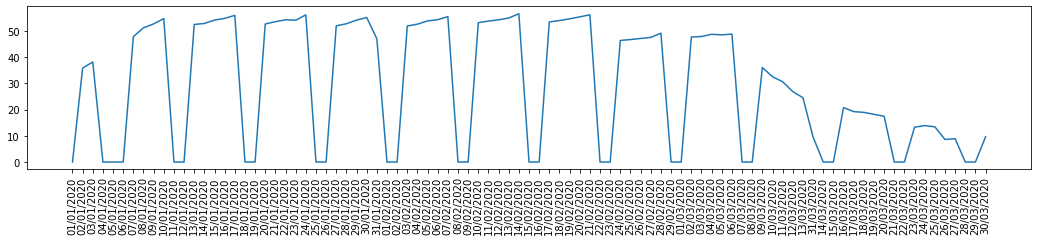

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


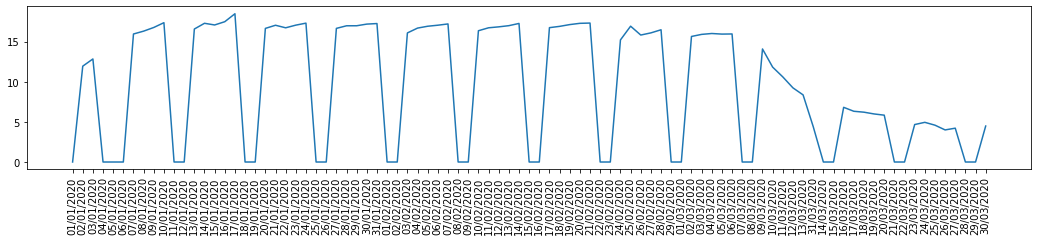

Piazzale Milano (ex SS 9) c/o ponte fiume Po


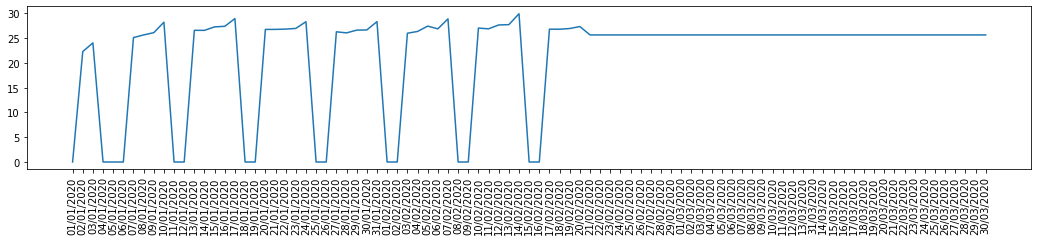

SP 1 da Villafranca di Forlì al confine provinciale


In [14]:
counter = 0
for index, strada in agg_by_Strada:
    print(index)
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Feriali'])
    plt.xticks(rotation='vertical')
    plt.show()

#### Visualizzazione trafico transiti per ogni strada durante i giorni festivi 
<p>Per ragioni di spazio si visualizzano solo le prime due strade. </p>

Asse viario Modena-Sassuolo tra Modena e Baggiovara


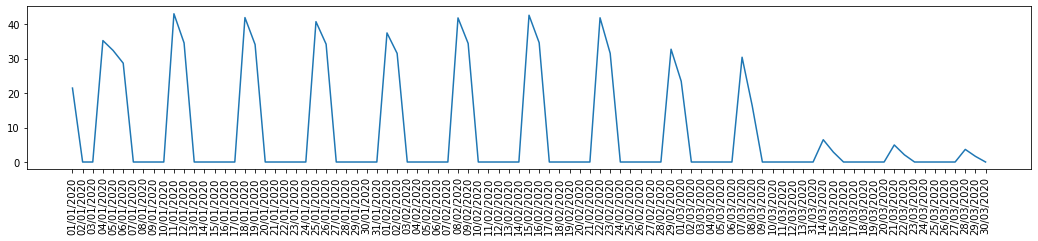

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


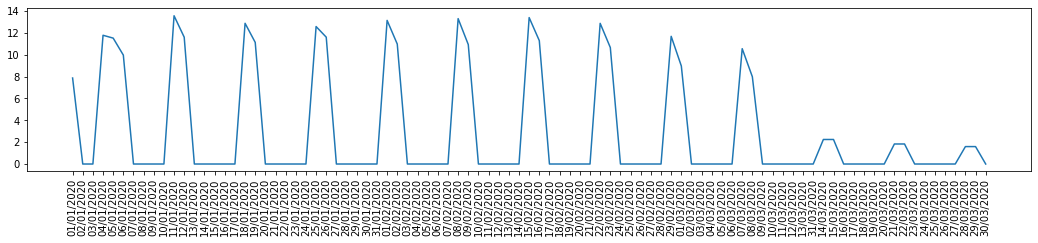

Piazzale Milano (ex SS 9) c/o ponte fiume Po


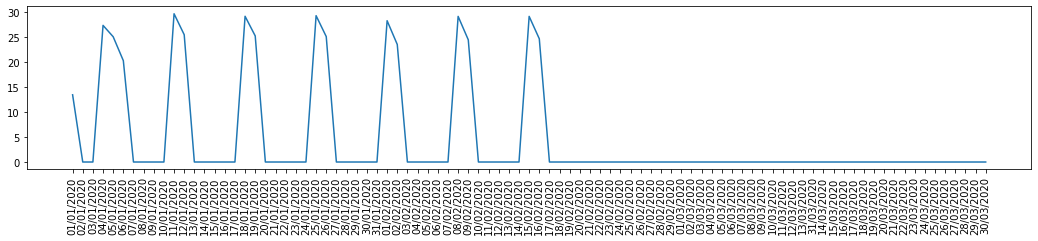

SP 1 da Villafranca di Forlì al confine provinciale


In [15]:
counter = 0
for index, strada in agg_by_Strada:
    print(index)
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Festivi'])
    plt.xticks(rotation='vertical')
    plt.show()

### Scomposizione Serie Temporale 
<p>La scomposizione STL permette di rappresentare una serie temporale come somma delle sue componenti : </p>

-Trend

-Stagionalità

-Rumore 

Asse viario Modena-Sassuolo tra Modena e Baggiovara


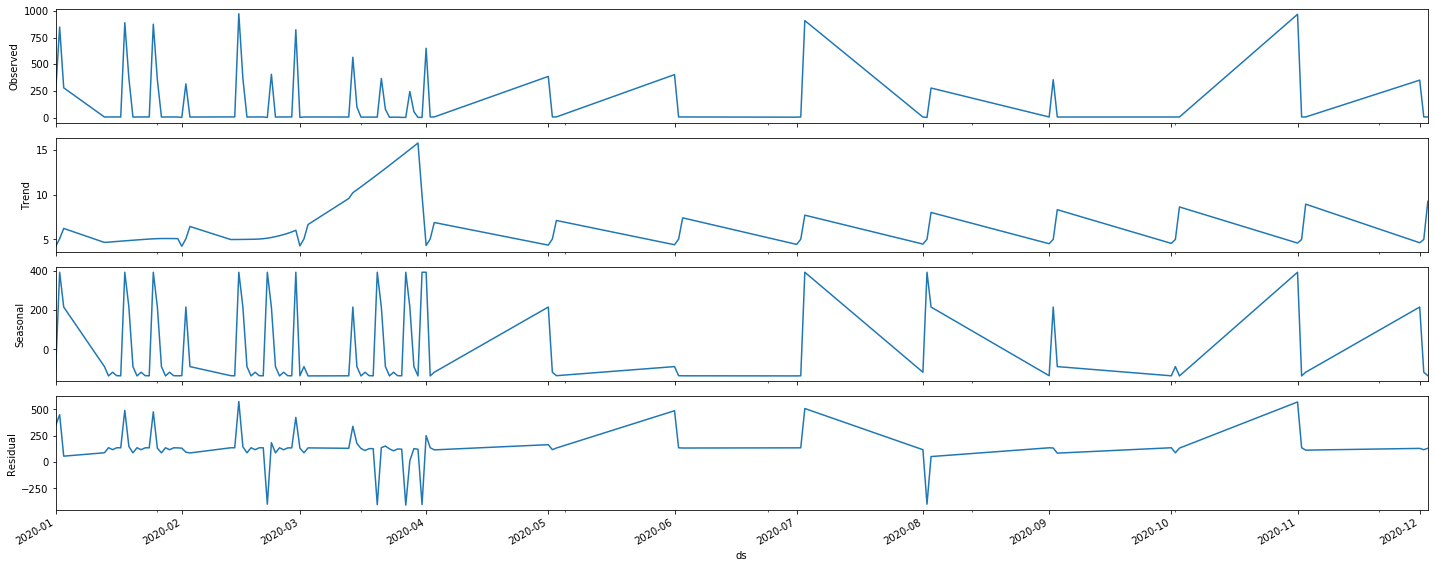

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


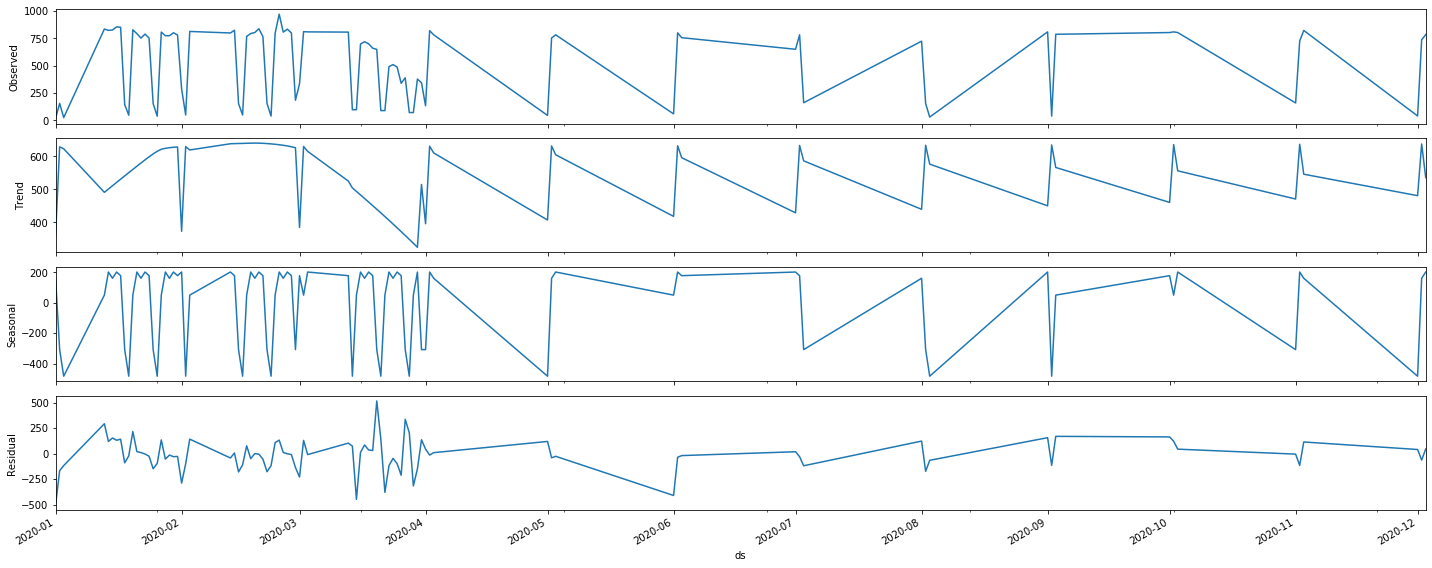

Piazzale Milano (ex SS 9) c/o ponte fiume Po


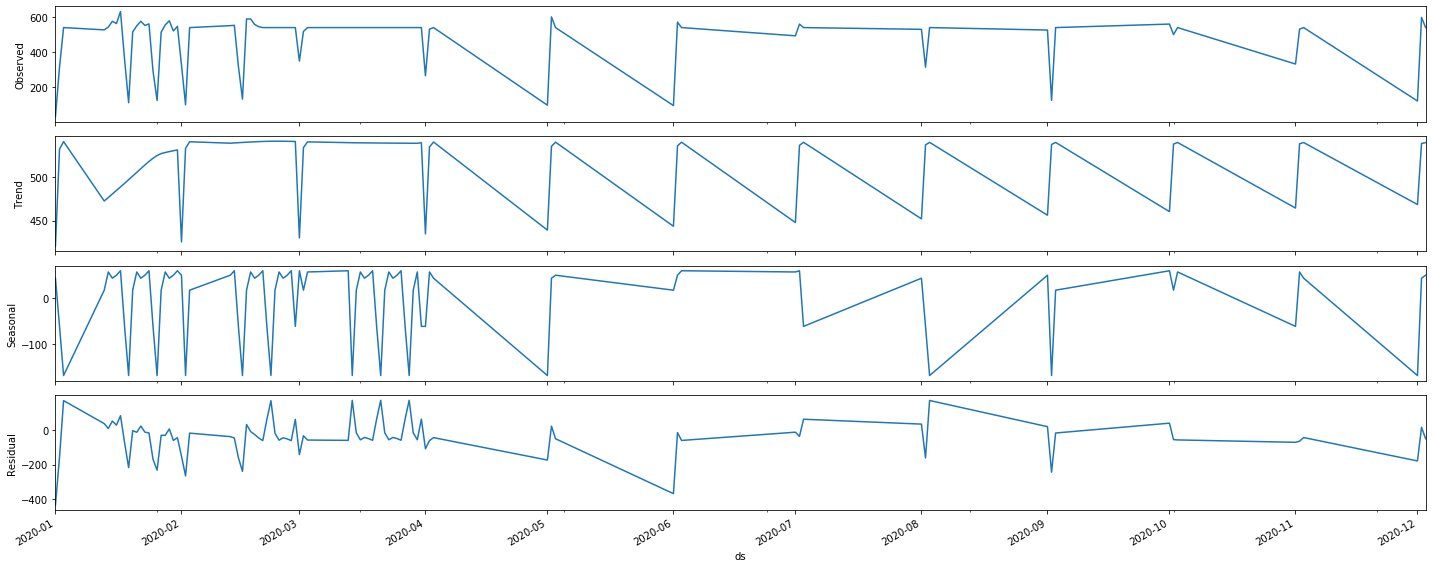

SP 1 da Villafranca di Forlì al confine provinciale


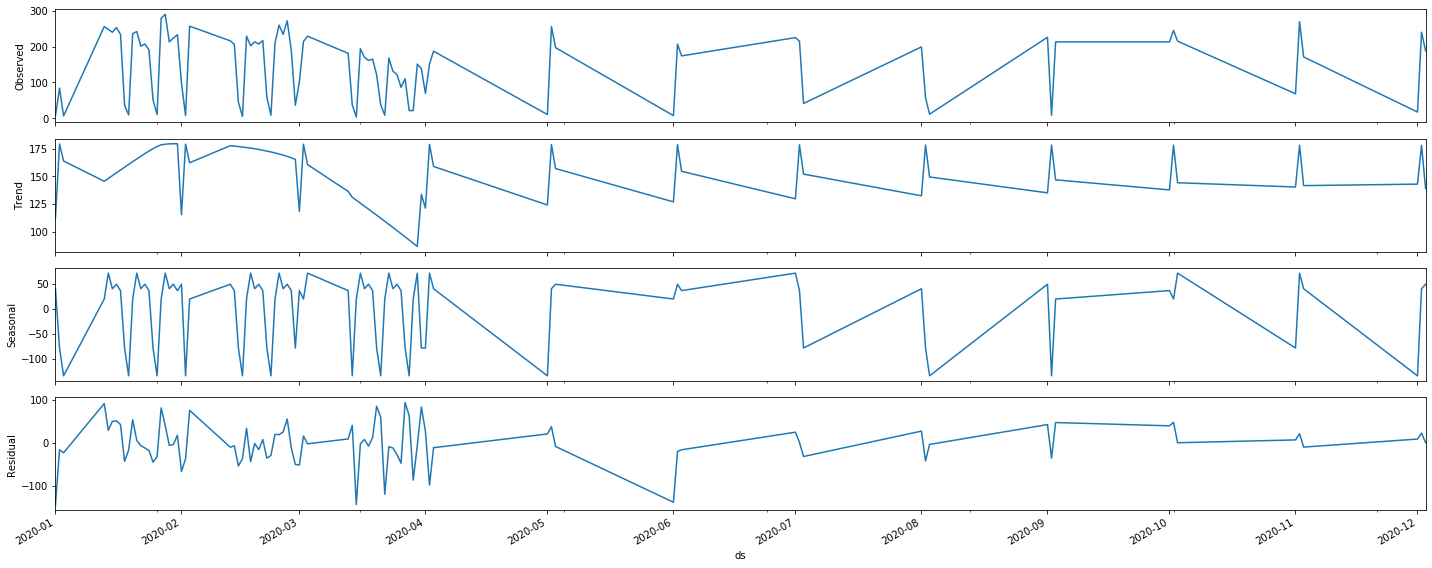

In [19]:
counter = 0
for index, strada in agg_by_Strada:
    counter += 1
    if counter > 4: break
    print(index)
    dates4dec = []
    cell_values = []
    strada = strada.fillna(method='ffill')
    
    for index, row in strada.iterrows():
    
        date = row['Giorno']
        splited = date.split('/')
        day = splited[0]
        month = splited[1]
        year = splited[2]
        
        data_f = day+'-'+month+'-'+year
        
        cell_values.append(float(row['Transiti - Pesanti']))
        dates4dec.append(data_f) 
    
    dict_i = {'ds': dates4dec, 'y':cell_values}
    data4deco = pd.DataFrame(dict_i, index=None, columns=None)  
    data4deco['ds'] = pd.to_datetime(data4deco['ds'])
    data4deco = data4deco.set_index('ds')
    
    decomp = decompose(data4deco['y'], period = 7)

    with plt.rc_context():
        plt.rc("figure", figsize=(20,8))
        decomp.plot()
        plt.show()

### Visualizzazione dati location 
<p> Ogni postazione ha un certo numero e delle coordinate che possono essere visualizzate su una mappa</p>

In [16]:
geo_df = gpd.read_file('MTS/PostazioniSensoriWGS84.shp')
geo_df.head(2)

,NAME,x,y,geometry
0,124,9.668308,45.001248,POINT (9.66831 45.00125)
1,127,9.764245,45.013715,POINT (9.76424 45.01371)


In [17]:
m = folium.Map(location = [44.5011,11.3602], zoom_start=8)

for index, row in geo_df.iterrows():
    x = float(row['x'])
    y = float( row['y'])
    name = row['NAME']
    folium.Marker([y, x], popup='<i>Postazione '+str(name)+'</i>', icon=folium.Icon(color='green')).add_to(m)
display(m)

In [18]:
m = folium.Map(
    location=[44.5011,11.3602],
    tiles='Stamen Toner',
    zoom_start=8
)
for index, row in geo_df.iterrows():
    x = float(row['x'])
    y = float( row['y'])
    name = row['NAME']
    folium.Marker([y, x], popup='<i>Postazione '+str(name)+'</i>', icon=folium.Icon(color='green')).add_to(m)
display(m)
